In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np
import math

sns.set_context("poster")
sns.set_style("white")

sns.set_palette('muted')

%matplotlib inline

## Load the Data

In [2]:
output_dir = "./output/"
df = pd.read_csv("./data/1-cat.csv")
df.head()

,year,count,count_domain,category
0,2022,6180,218240,Materials Science
1,2021,4443,229275,Materials Science
2,2020,2751,203388,Materials Science
3,2019,1600,193931,Materials Science
4,2018,699,166626,Materials Science


# Calculate relevant stats on the dataframe

In [3]:
def growth(x):
    return  (x[-1]-x[0]) / x[0]
    
def cagr(x):
    return  (x[-1] / x[0]) ** (1 / (len(x) - 1)) - 1

        
def calculate_stats(group):
    group['yoy_1'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(2,2).apply(growth, raw=True)
    group['yoy_2'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(3,2).apply(growth, raw=True)
    group['yoy_5'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(6,2).apply(growth, raw=True)
    group['cagr_1'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(2,2).apply(cagr, raw=True)*100
    group['cagr_2'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(3,2).apply(cagr, raw=True)*100
    group['cagr_5'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(6,2).apply(cagr, raw=True)*100
    return group

df['normalized'] = 100*df['count']/df['count_domain']
df = df.groupby('category').apply(calculate_stats)

/var/folders/nl/djsswp9n6l1792htfvwly1lw0000gn/T/ipykernel_98005/1719550333.py:18: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('category').apply(calculate_stats)


# Show Latest Stats

cagr - Compound Annual Growth Rate (%)

yoy_n - current count / count n years ago

In [4]:
df[df.year==2022]

,year,count,count_domain,category,normalized,yoy_1,yoy_2,yoy_5,cagr_1,cagr_2,cagr_5
0,2022,6180,218240,Materials Science,2.831745,0.390952,1.246456,12.522976,39.095206,49.881815,68.350517
23,2022,8842,297229,Chemistry,2.974811,0.274063,0.783021,4.512469,27.406340,33.529801,40.691944
46,2022,6829,184803,Physics,3.695286,0.293126,0.940057,12.260194,29.312630,39.285922,67.691086
113,2022,2328,34490,"Geosciences, Multidisciplinary",6.749783,0.053871,0.640592,12.227273,5.387053,28.085595,67.607737


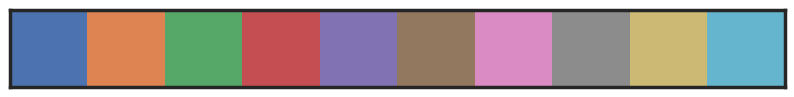

In [5]:
# Set plot time range
years = (2000, 2022)

# Set some marker defaults
marker_size = 150
marker_alpha = 0.6

# Set figure save parameters
fig_dpi = 1000

# Define plot sizes
golden = [4*1.618,4]

# Define palette options
colors = ["blue","orange","green"]*3
sns.set_palette("deep")
sns.palplot(sns.color_palette())

# Visualize with MatplotLib

## All Together

In [6]:
df.category.unique()

array(['Materials Science', 'Chemistry', 'Physics', 'Computer Science',
       'Computer Science, Artificial Intelligence',
       'Geosciences, Multidisciplinary'], dtype=object)

In [7]:
golden

[6.472, 4]

# Normalized Plot

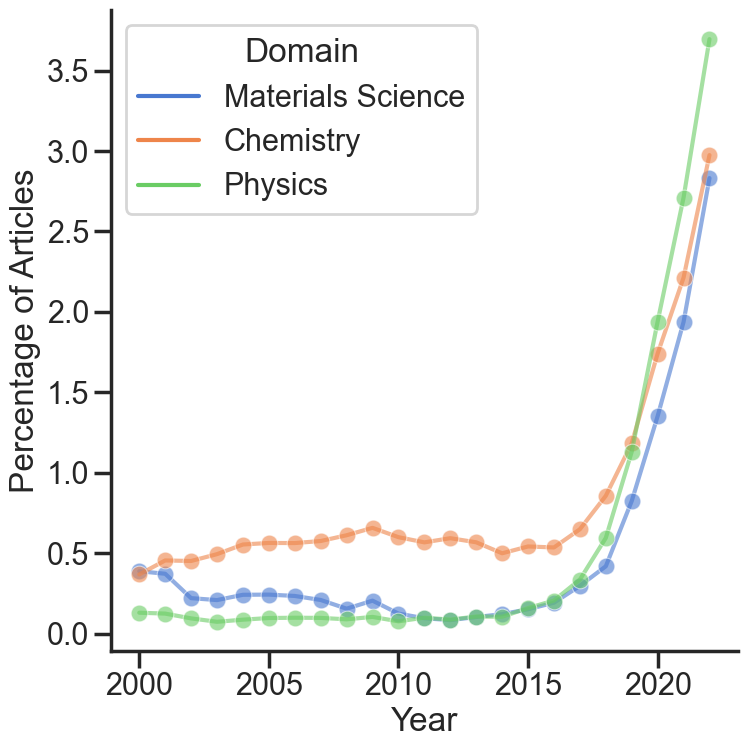

In [12]:
sns.set_context("poster")
sns.set_style('white')



sns.set_palette('muted')

fig, ax = plt.subplots()
fig.set_size_inches(8,8)

ax1_list = ["Materials Science", "Chemistry", "Physics"]
#ax2_list = ["Computer Science, Artificial Intelligence"]



data1 = df[df['category'].isin(ax1_list)]
#data2 = df[df['category'].isin(ax2_list)]

data1 = data1[data1['year']>=2000]

g = sns.lineplot(x="year", 
             y="normalized",
             hue="category", 
             data=data1,
             marker="o",
             alpha=marker_alpha,
             ax=ax)

ax.tick_params(bottom=True, left=True)
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Articles")
plt.tight_layout()
plt.legend(title='Domain', loc='upper left')
sns.despine()


fig.savefig(os.path.join(output_dir,'2023-normalized.png'),
             dpi=fig_dpi)

# Raw Counts

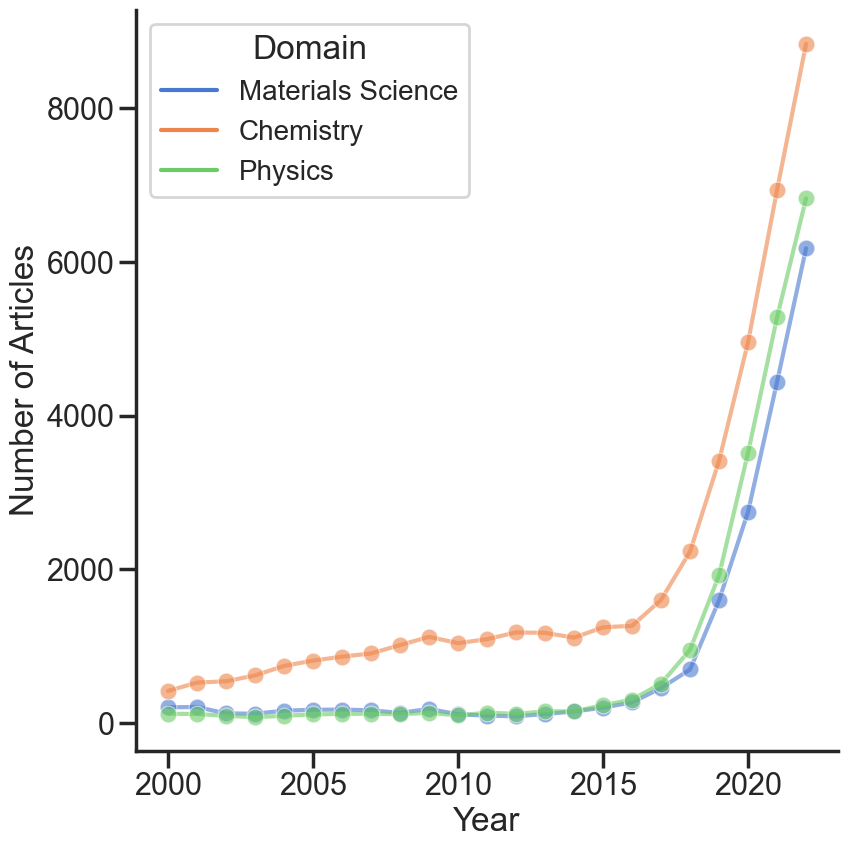

In [13]:
sns.set_context("poster")
sns.set_style("white")

sns.set_palette('muted')

fig, ax = plt.subplots()
fig.set_size_inches(9,9)

ax1_list = ["Materials Science", "Chemistry", "Physics"]



data1 = df[df['category'].isin(ax1_list)]

data1 = data1[data1['year']>=2000]

g = sns.lineplot(x="year", 
             y="count",
             hue="category", 
             data=data1,
             marker="o",
             alpha=marker_alpha,
             ax=ax)

ax.tick_params(bottom=True, left=True)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Articles")
plt.tight_layout()
plt.legend(title='Domain', loc='upper left', prop={'size': 20})
sns.despine()


fig.savefig(os.path.join(output_dir,'2023-count.png'),
             dpi=fig_dpi)

/var/folders/nl/djsswp9n6l1792htfvwly1lw0000gn/T/ipykernel_98005/2321775041.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1 = data1[df['year']>2010]
/var/folders/nl/djsswp9n6l1792htfvwly1lw0000gn/T/ipykernel_98005/2321775041.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2 = data2[df['year']>years[0]]


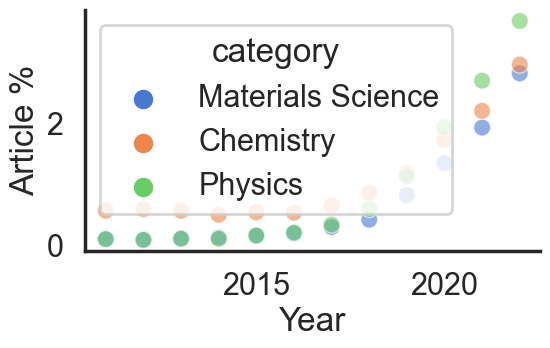

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(golden)

ax1_list = ["Materials Science", "Chemistry", "Physics"]
ax2_list = ["Computer Science"]


data1 = df[df['category'].isin(ax1_list)]
data2 = df[df['category'].isin(ax2_list)]

data1 = data1[df['year']>2010]
data2 = data2[df['year']>years[0]]


sns.scatterplot(x="year", y="normalized",
             hue="category", data=data1, 
                s=marker_size, alpha=marker_alpha)

ax.set_xlabel("Year")
ax.set_ylabel("Article %")
sns.despine()
plt.tight_layout()

In [11]:
sns.scatterplot(x="year", y="normalized",
                hue="category", data=data, 
                s=marker_size, alpha=marker_alpha,
                ax=ax)
ax2 = plt.twinx()
sns.lineplot(data=df.column2, color="b", ax=ax2)

NameError: name 'data' is not defined

In [ ]:
ax = df.plot(x="date", y="column1", legend=False)
ax2 = ax.twinx()
df.plot(x="date", y="column2", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(golden)
add_events = False

category_list = ["Computer Science", "Materials Science", "Chemistry", "Physics"]

df = df[df['category'].isin(category_list)]
data = df[df['year']>years[0]]

sns.lineplot(x="year", 
             y="count",
             hue="category", 
             data=data,
             marker="o",
             alpha=marker_alpha,
             ax=ax)

# sns.scatterplot(x="year", y="normalized",
#                 hue="category", data=data, 
#                 s=marker_size, alpha=marker_alpha,
#                 ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("# Articles")
sns.despine()
plt.tight_layout()

# plt.text(2012, 1.8, 'Preliminary Update', fontsize=12, fontweight="bold")
# plt.text(2012, 1.6, '2022-01-20', fontsize=12)
# plt.text(2012, 1.4, '2021 data incomplete', fontsize=12)




if add_events:
    plt.axvline(x=2011.58, alpha=0.5) # June 24, 2011, Holdren OSP memo 
    plt.text(2011.7, 0.75, 'MGI Whitepaper', fontsize=12)
    plt.legend(title='', loc='upper left', labels=["Materials Science", "Chemistry","Physics"])
#     plt.text(2012.5, 0.9, 'MDF Funded')



fig.savefig(os.path.join(output_dir,'1-all-line.png'),
             dpi=fig_dpi)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(golden)
add_events = False

category_list = ["Materials Science", "Chemistry", "Physics"]

df = df[df['category'].isin(category_list)]
data = df[df['year']>years[0]]

sns.lineplot(x="year", 
             y="normalized",
             hue="category", 
             data=data,
             marker="o",
             alpha=marker_alpha,
             ax=ax)

# sns.scatterplot(x="year", y="normalized",
#                 hue="category", data=data, 
#                 s=marker_size, alpha=marker_alpha,
#                 ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Article Fraction (%)")
sns.despine()
plt.tight_layout()

# plt.text(2012, 1.8, 'Preliminary Update', fontsize=12, fontweight="bold")
# plt.text(2012, 1.6, '2022-01-20', fontsize=12)
# plt.text(2012, 1.4, '2021 data incomplete', fontsize=12)




if add_events:
    plt.axvline(x=2011.58, alpha=0.5) # June 24, 2011, Holdren OSP memo 
    plt.text(2011.7, 0.75, 'MGI Whitepaper', fontsize=12)
    plt.legend(title='', loc='upper left', labels=["Materials Science", "Chemistry","Physics"])
#     plt.text(2012.5, 0.9, 'MDF Funded')



fig.savefig(os.path.join(output_dir,'1-all-line-norm.png'),
             dpi=fig_dpi)

In [9]:
df

,year,count,count_domain,category,normalized,yoy_1,yoy_2,yoy_5,cagr_1,cagr_2,cagr_5
0,2021,3498,215277,Materials Science,1.624883,0.543689,1.807384,28.394958,54.368932,67.552488,96.632169
1,2020,2266,202620,Materials Science,1.118350,0.818620,3.811040,20.177570,81.861958,119.340838,84.151485
2,2019,1246,193664,Materials Science,0.643382,1.645435,4.235294,18.468750,164.543524,128.807651,81.078802
3,2018,471,166364,Materials Science,0.283114,0.978992,2.957983,9.239130,97.899160,98.946807,59.240164
4,2017,238,153367,Materials Science,0.155183,1.000000,1.224299,7.814815,100.000000,49.140842,54.540616
...,...,...,...,...,...,...,...,...,...,...,...
61,2004,16,109419,Physics,0.014623,0.333333,0.066667,0.333333,33.333333,3.279556,7.456993
62,2003,12,103159,Physics,0.011633,-0.200000,0.333333,0.000000,-20.000000,15.470054,0.000000
63,2002,15,100191,Physics,0.014971,0.666667,0.250000,0.250000,66.666667,11.803399,11.803399
64,2001,9,94797,Physics,0.009494,-0.250000,-0.250000,-0.250000,-25.000000,-25.000000,-25.000000


In [10]:
df[df.category=='Chemistry']

,year,count,count_domain,category,normalized,yoy_1,yoy_2,yoy_5,cagr_1,cagr_2,cagr_5
22,2021,5801,294371,Chemistry,1.970642,0.340652,0.940783,4.202691,34.065172,39.311983,39.073889
23,2020,4327,283166,Chemistry,1.528079,0.447641,1.228115,2.962454,44.764135,49.268729,31.702146
24,2019,2989,288324,Chemistry,1.036681,0.539135,1.210799,2.071942,53.913491,48.687552,25.164917
25,2018,1942,260615,Chemistry,0.745160,0.436391,0.741704,0.826905,43.639053,31.973635,12.808855
26,2017,1352,247021,Chemistry,0.547322,0.212556,0.238095,0.291309,21.255605,11.269728,5.246098
27,2016,1115,236354,Chemistry,0.471750,0.021062,0.145940,0.135438,2.106227,7.048605,2.572910
28,2015,1092,229803,Chemistry,0.475190,0.122302,0.027281,0.189542,12.230216,1.354885,3.532331
29,2014,973,222546,Chemistry,0.437213,-0.084666,-0.070678,0.007246,-8.466604,-3.598658,0.144509
30,2013,1063,206685,Chemistry,0.514309,0.015282,0.082485,0.174586,1.528176,4.042526,3.270656
31,2012,1047,198814,Chemistry,0.526623,0.066191,0.140523,0.352713,6.619145,6.795266,6.228523


## Grid

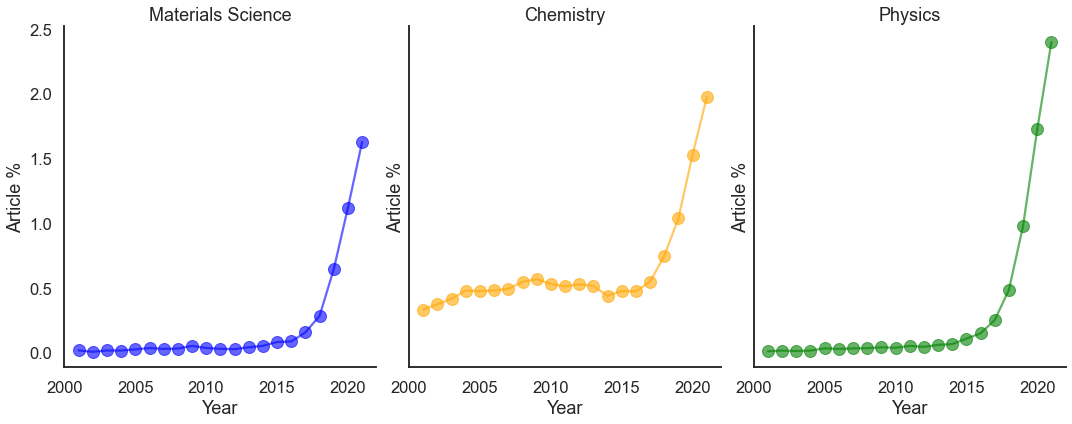

In [29]:
# Initialize a grid of plots with an Axes for each domain
categories = df['category'].unique()
f, axs = plt.subplots(1,len(categories), sharey=True, figsize=(15,6))

for i, cat in enumerate(categories):
    data = df[(df['category']==cat) & (df['year']>years[0])]
    axs[i].plot(data['year'], data['normalized'], 
                marker="o", markersize=12, color=colors[i], 
                alpha=marker_alpha) #c=colors[i], alpha=marker_alpha, s=marker_size)
    axs[i].set_title(cat)
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Article %")
    sns.despine()
    plt.tight_layout()
f.savefig(os.path.join(output_dir,'1-grid-line-norm.png'),dpi=fig_dpi)

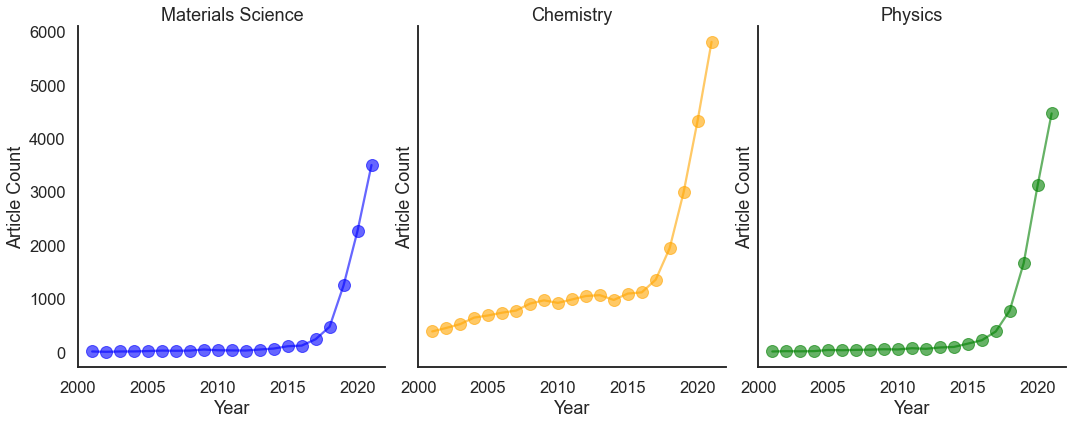

In [11]:
# Initialize a grid of plots with an Axes for each domain
categories = df['category'].unique()
f, axs = plt.subplots(1,len(categories), sharey=True, figsize=(15,6))

for i, cat in enumerate(categories):
    data = df[(df['category']==cat) & (df['year']>years[0])]
    axs[i].plot(data['year'], data['count'], 
                marker="o", markersize=12, color=colors[i], 
                alpha=marker_alpha) #c=colors[i], alpha=marker_alpha, s=marker_size)
    axs[i].set_title(cat)
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Article Count")
    sns.despine()
    plt.tight_layout()
f.savefig(os.path.join(output_dir,'1-grid-line.png'),dpi=fig_dpi)

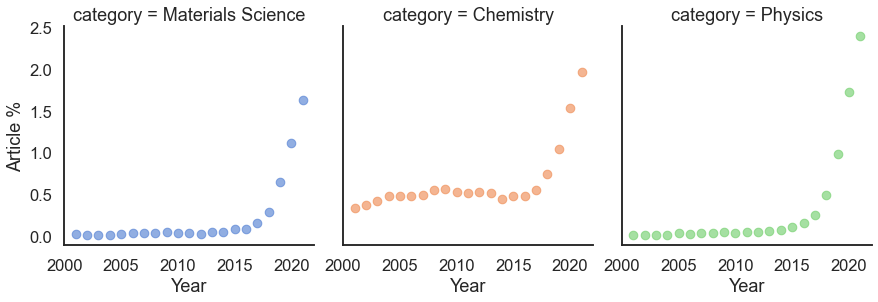

In [12]:
data = df[df['year']>years[0]]
sns_fig = sns.lmplot(x="year", y="normalized", col="category", 
           hue="category", data=data,
           col_wrap=3, ci=None, palette="muted", height=4, fit_reg=False,
           scatter_kws={"s": marker_size/2, "alpha": marker_alpha})
sns_fig.set_axis_labels("Year","Article %")
sns_fig.savefig(os.path.join(output_dir,"1-grid-norm.png"), dpi=fig_dpi)

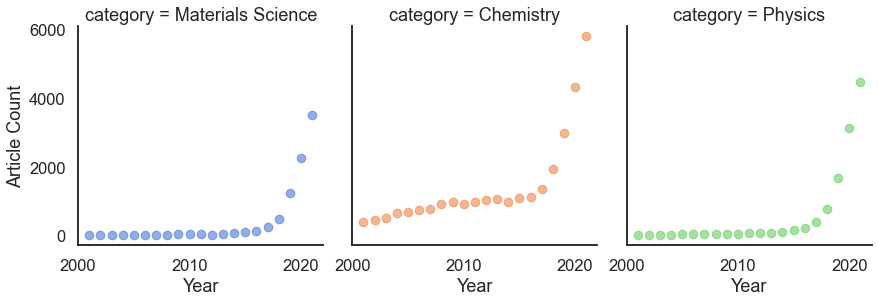

In [13]:
data = df[df['year']>years[0]]
sns_fig = sns.lmplot(x="year", y="count", col="category", 
           hue="category", data=data,
           col_wrap=3, ci=None, palette="muted", height=4, fit_reg=False,
           scatter_kws={"s": marker_size/2, "alpha": marker_alpha})
sns_fig.set_axis_labels("Year","Article Count")
sns_fig.savefig(os.path.join(output_dir,"1-grid.png"), dpi=fig_dpi)

# Individual

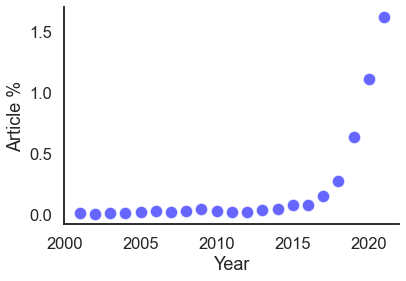

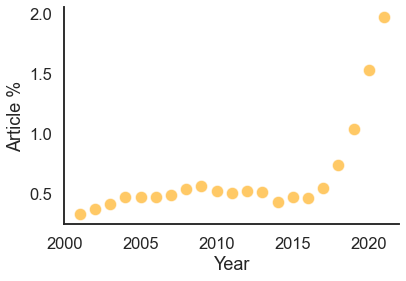

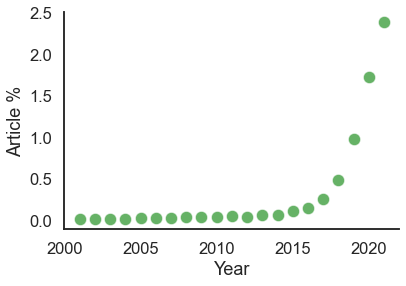

In [14]:
for i,category in enumerate(df['category'].unique()):
    fig = plt.figure()

    data = df[(df['category']==category) & (df['year']>years[0])]
    ax = sns.scatterplot(x="year", y="normalized",
                        data=data, s=marker_size, 
                        alpha=marker_alpha, color=colors[i])
    ax.set_xlabel("Year")
    ax.set_ylabel("Article %")
    sns.despine()
    fig.savefig(os.path.join(output_dir,'1-{}-norm.png'.format(category)),dpi=fig_dpi)

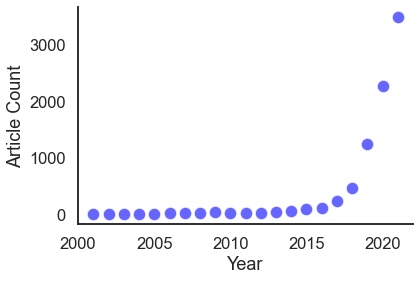

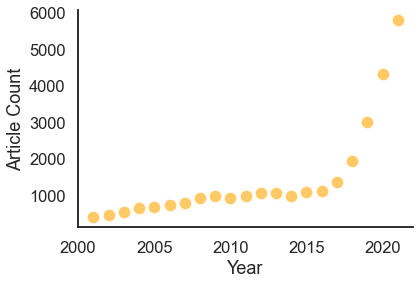

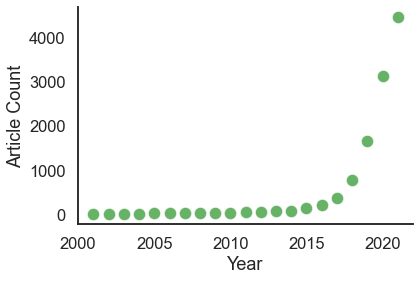

In [15]:
for i,category in enumerate(df['category'].unique()):
    fig = plt.figure()

    data = df[(df['category']==category) & (df['year']>years[0])]
    ax = sns.scatterplot(x="year", y="count",
                        data=data, s=marker_size, 
                        alpha=marker_alpha, color=colors[i])
    ax.set_xlabel("Year")
    ax.set_ylabel("Article Count")
    sns.despine()
    fig.savefig(os.path.join(output_dir,'1-{}.png'.format(category)),dpi=fig_dpi)

# Visualize with Altair

## All Together

In [16]:
!pip install altair

You should consider upgrading via the '/Users/ben/anaconda3/envs/jupyter/bin/python -m pip install --upgrade pip' command.


In [17]:
import altair as alt
data = df[df['category']=='Chemistry']

charts = []

for i, category in enumerate(df['category'].unique()):
    data = df[df['category']==category]
    chart = alt.Chart(data[['year','count']]).mark_circle(size=marker_size, color=colors[i]).encode(
        x=alt.X('year', scale=alt.Scale(domain=(2000, 2019))),
        y=alt.Y('count')).properties(
        width=500,
        height=350,
        title=category
    )
    charts.append(chart)

## All Together

In [18]:
charts[0] + charts[1] + charts[2]

alt.LayerChart(...)

## Grid

In [19]:
charts[0] | charts[1] | charts[2]

alt.HConcatChart(...)

## Individual

In [20]:
charts[0]

alt.Chart(...)

In [21]:
charts[1]

alt.Chart(...)

In [22]:
charts[2]

alt.Chart(...)